In [1]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
mongo = client.hai

In [2]:
import time
from datetime import datetime, date
import calendar

start_time = time.time()-3600#calendar.timegm(date(2017, 10, 31).timetuple())
end_time = time.time()#calendar.timegm(date(2017, 11, 2).timetuple())
username = "sean"

In [3]:
query = {"user_name": username, "summary":{"$exists": True}, "time": {"$gt": start_time, "$lt": end_time}}
cams = mongo.images.find(query).distinct("cam_id")
print(cams)

[]


In [4]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

import controllers.learner.datasets as ds
ds.port = 27017

In [5]:
cam_data = []
for cam in cams:
    cam_query = dict(query)
    cam_query["cam_id"] = cam
    cam_data.append(list(mongo.images.find(cam_query).sort([("time", -1)])))

In [6]:
print([len(data) for data in cam_data])

[]


In [7]:
import matplotlib.pyplot as plt
for i, data in enumerate(cam_data):
    plt.plot([d["time"] for d in data], [i] * len(data), "o")
plt.show()

In [9]:
hue_data = ds.get_hue_data(username, start_time, end_time, sort_time=1)
print(len(hue_data))
print(hue_data[0])

0


IndexError: list index out of range

In [31]:
query = {"user_name": username}
hue_data = list(mongo.print.find(query))
print(len(hue_data))

11


In [32]:
import scipy.misc
%matplotlib inline

image_data = []
for data in hue_data:
    data2 = []
    start_time = int(data["time"]+0)
    end_time = int(data["time"]+30)
    interval = 5
    
    for s in range(start_time, end_time, interval):
        interval_data = []
        skip = False
        
        for cam in ["misc0"]:
            query = {"user_name": username, "summary":{"$exists": True}, "cam_id": cam, "time": {"$gte": s, "$lt": s+interval}}
            n = mongo.images.find(query)
            
            if n.count() > 0:
                interval_data.append(n[0])
            else:
                interval_data.append(None)
                #skip = True
                
        if not skip:
            data2.append(interval_data)
    image_data.append(data2)

In [33]:
print(len(hue_data), len(image_data))

11 11


apple


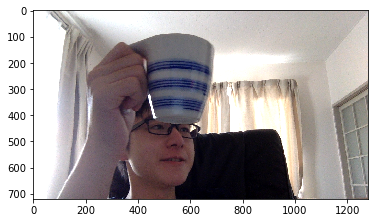

apple


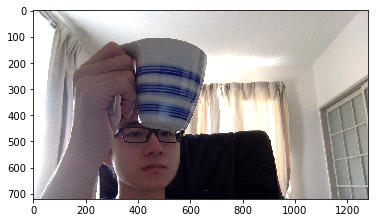

apple


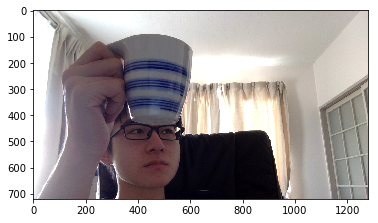

apple


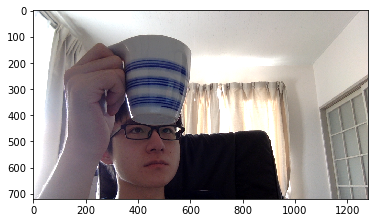

apple


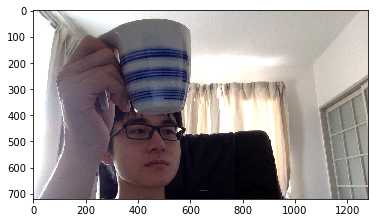

apple


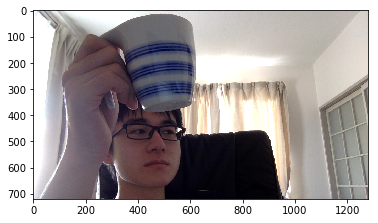

face


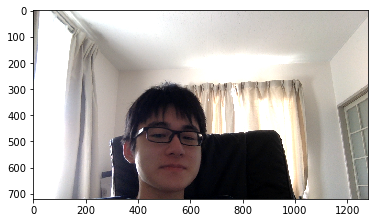

face


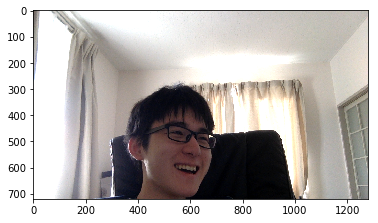

face


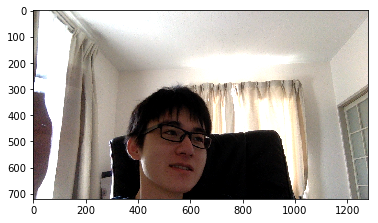

face


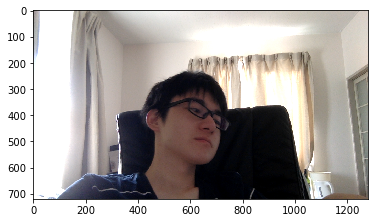

face


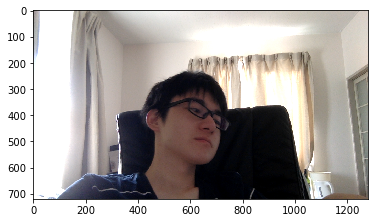

face


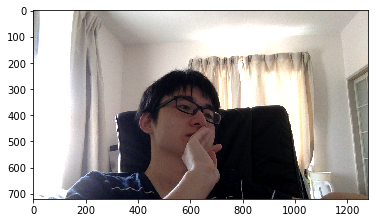

face


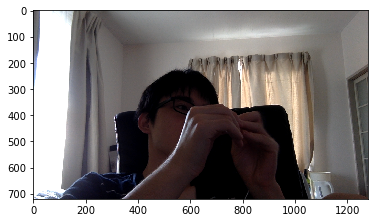

face


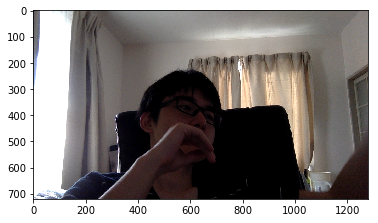

face


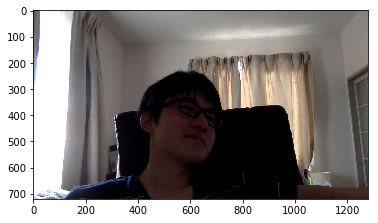

face


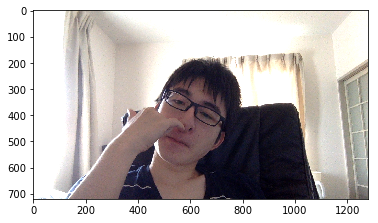

face


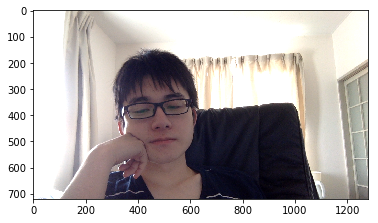

face


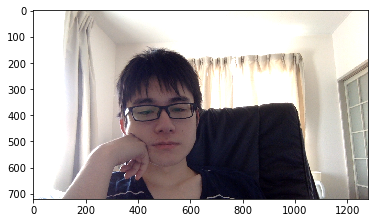

face


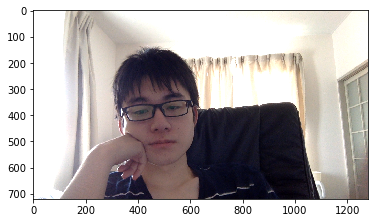

apple


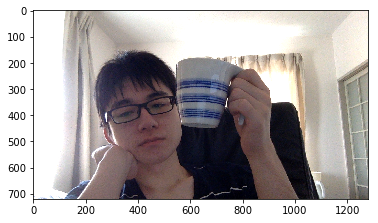

apple


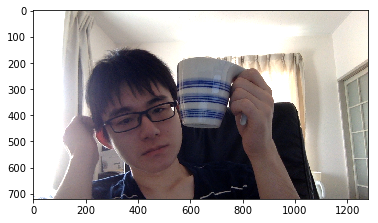

apple


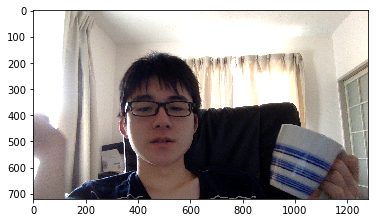

apple


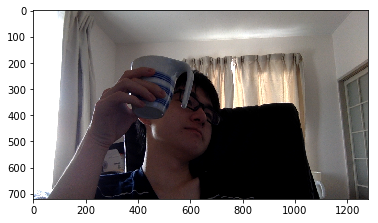

apple


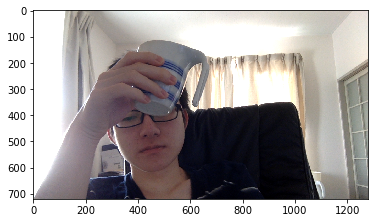

face


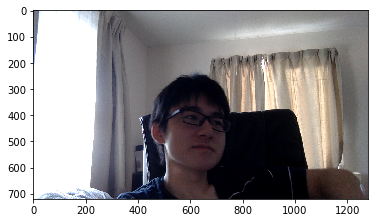

face


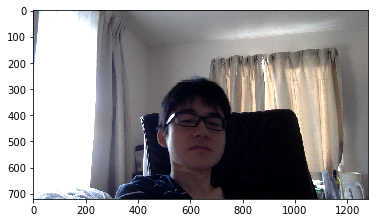

apple


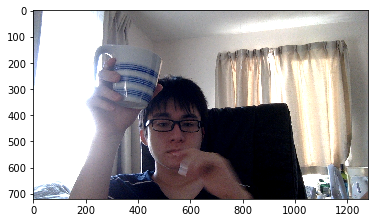

apple


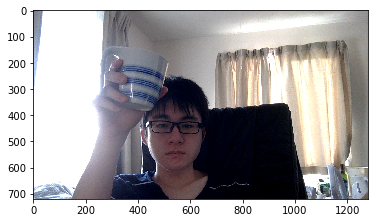

apple


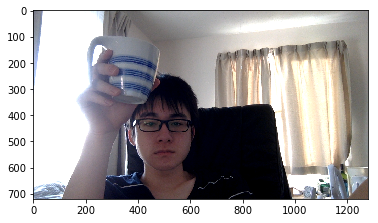

In [34]:
import numpy as np

dataX, dataY = [], []
classes = list(set([y["text"] for y in hue_data]))

for x, y in zip(image_data, hue_data):
    for imgs in x:
        row = []
        skip = False
        for cam in imgs:
            if cam is not None:
                print(y["text"])
                plt.figure()
                plt.imshow(scipy.misc.imread("./images/raw_images/" + cam["filename"]))
                plt.show()
                row.append(ds.data2vec([], [], cam, False, False, False, True, False, False))
            else:
                skip = True
                break
        if not skip:
            dataX.append(np.concatenate(row))
            dataY.append(classes.index(y["text"]))

In [ ]:
print(dataX, dataY)